<center>
<h1>CSC 301 Spring 2018: Homework 3</h1>
<h2>Pooneet Thaper</h2>
<h2>Professor Irina Gladkova</h2>
</center>

## Problem 1:
### Splines can be used to approximate a “parametric curve” $(x(t),(y(t))$ by using a spline for each of the functions separately and then plotting the resulting function $y$ vs. $x$.

### Draw whatever you like on a graph paper, place a few points on your drawing and take down the coordinates of the points (it doesn’t have to be many points: 5 to 12 points is enough, depending on the drawing if chosen wisely).

[(0.5172978838465893, 0.39244246646503067), (0.9469626038148141, 0.6180523472528092), (0.7654597593969069, 0.411930094858746), (0.2823958439671127, 0.002464881200886171), (0.22104536326165258, 0.8840321823721048), (0.6862220852374669, 0.8849475383764736), (0.16713920310005626, 0.30040968936648094)]


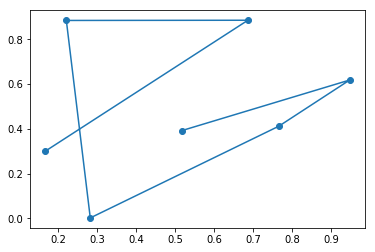

In [75]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(23)
num_points = 7

x_values = np.random.rand(num_points)
y_values = np.random.rand(num_points)

# x_values, y_values = (list(val) for val in zip(*sorted(zip(x_values,y_values))))
# this was for sorting it, but, after reviewing the problem I don't think I should be 
print(list(zip(x_values,y_values)))

plt.plot(x_values, y_values, marker='o')
plt.show()

### Create two arrays with these data and find the spline approximations $S_x(t)$ and $S_y(t)$ for each of the functions $x(t)$ and $y(t)$ with parameter $t$ representing the array index. Plot the resulting $S_x(t)$ vs. $S_y(t)$.

#### Cubic spline:
$$
\begin{equation}
    q(x) = a_0 + a_1(x-x_L) + a_2(x-x_L)^2 + a_3(x-x_L)^2(x-x_R) \\[10pt]
    q'(x) = a_1 + 2a_2(x-x_L) + 2a_3(x-x_L)(x-x_R)+a_3(x-x_L)^2\\[10pt]
    q''(x) = 2a_2 - 2a_3(3x-2x_L-x_R)\\[10pt]
    a_0 = y_L \\[10pt]
    a_1 = S_L \\[10pt]
    a_2 = \frac{\frac{y_R - y_L}{x_R - x_L} - S_L}{x_R - x_L} \\[10pt]
    a_3 = \frac{S_R + S_L - 2 \frac{y_R - y_L}{x_R - x_L}}{(x_R - x_L)^2}
\end{equation}
$$
#### In order to get the cubic spline for n points, we will need to have n-1 splines. Each of these splines will need to satisfy the conditions (pass through both points and have first and second derivitives continuous with adjacent splines).
$$
\begin{equation}
  q_i(x_L) = f(x_L)\\[10pt]
  q_i(x_R) = f(x_R)\\[10pt]
  q_i'(x_R) = q_{i+1}'(x_R) \quad \textrm{or} \quad q_i'(x_R) - q_{i+1}'(x_R) = 0\\[10pt]
  q_i''(x_R) = q_{i+1}''(x_R) \quad \textrm{or} \quad q_i''(x_R) - q_{i+1}''(x_R) = 0
\end{equation}
$$
#### We can accomplish this by writing an equation using matricies that contains all of these equations for each of the segments of the final spline. This means for each segment there need be two equations (2*(n-1) equations total), one forcing the segment to pass through the left point and the other forcing the segment to pass through the right point. Next, we will need n-2 equations to make sure that the first derivitives are continuous between the segments as well as n-2 equations to do the same for the second derivitive. Lastly, we need 2 equations to force the edge condition to be satisfied.

### Matrix solution (shown here for 3 points but will be implemented generally in code)

#### Considering the equations for $q(x)$, $q'(x)$, and $q''(x)$ from class:
$$
\begin{equation}
    q(x) = a_0 + a_1(x-x_L) + a_2(x-x_L)^2 + a_3(x-x_L)^2(x-x_R) \\[10pt]
    q'(x) = a_1 + 2a_2(x-x_L) + 2a_3(x-x_L)(x-x_R)+a_3(x-x_L)^2\\[10pt]
    q''(x) = 2a_2 - 2a_3(3x-2x_L-x_R)\\[10pt]
    q'''(x) = -6a_3\\[10pt]
\end{equation}
$$




#### and the constraints put on the cubic spline
$$
\begin{equation}
    q_k(x_k) = a_{k,0} = f(x_k) \\[10pt]
    q_k(x_{k+1}) = a_{k,0} + a_{k,1}(x_{k+1}-x_k) + a_{k,2}(x_{k+1}-x_k)^2 = f(x_{k+1}) \\[10pt]
    q_k'(x_k) = a_{k,1} =\quad q_{k-1}'(x_k) = a_{k-1,1} + 2a_{k-1,2}(x_k-x_{k-1}) + a_{k-1,3}(x_k-x_{k-1})^2\\[10pt]
    q_k''(x_k) = 2a_{k,2} - 2a_3(x_{k+1}-x_k) =\quad q_{k-1}''(x_k) = 2a_{k-1,2} + 4a_3(x_k-x_{k-1}) \\[10pt]
\end{equation}
$$

#### Rearranging the last two equations, apply a natural/complete spline edge condition, and arranging all the resulting equations:
$$
\begin{bmatrix}
    0       & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
    0       & (x_{2}-x_{1})^2 & (x_{2} - x_{1}) & 1 & 0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 & 0 & 0 & 0 & 1  \\
    0 & 0 & 0 & 0 & 0 & (x_{3}-x_{2})^2 & (x_{3} - x_{2}) & 1 \\
    (x_2 - x_1)^2 & 2(x_2 - x_1) & 1 & 0 & 0 & 0 & -1 & 0 \\
    4(x_2 - x_1) & 2 & 0 & 0 & 2(x_3 - x_2) & -2 & 0 & 0 \\
    0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 & (x_3 - x_2)^2 & 2(x_3 - x_2) & 1 & 0
\end{bmatrix}
\begin{bmatrix}
    a_{1,3} \\
    a_{1,2} \\
    a_{1,1} \\
    a_{1,0} \\
    a_{2,3} \\
    a_{2,2} \\
    a_{2,1} \\
    a_{2,0} 
\end{bmatrix}
=
\begin{bmatrix}
    f(x_1) \\
    f(x_2) \\
    f(x_2) \\
    f(x_3) \\
    0 \\
    0 \\
    f'(x_1) \\
    f'(x_3)
\end{bmatrix}
$$ 

#### Likewise for Noton-Knot conditions $q_1'''(x_2) = q_2'''(x_2)$ and $q_{n-2}'''(x_{n-1}) = q_{n-1}'''(x_{n-1})$ with $n=4$ (not clearly seen with $n=3$ since $x_2 = x_{n-1}$):
$$
\begin{bmatrix}
    0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    0 & (x_{2}-x_{1})^2 & (x_{2} - x_{1}) & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 & 0 & (x_{2}-x_{1})^2 & (x_{2} - x_{1}) & 1 & 0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
    0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & (x_{3}-x_{2})^2 & (x_{3} - x_{2}) & 1 \\
    (x_2 - x_1)^2 & 2(x_2 - x_1) & 1 & 0 & 0 & 0 & -1 & 0 & 0 & 0 & 0 & 0 \\
    4(x_2 - x_1) & 2 & 0 & 0 & 2(x_3 - x_2) & -2 & 0 & 0 & 0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 & (x_2 - x_1)^2 & 2(x_2 - x_1) & 1 & 0 & 0 & 0 & -1 & 0 \\
    0 & 0 & 0 & 0 & 4(x_2 - x_1) & 2 & 0 & 0 & 2(x_3 - x_2) & -2 & 0 & 0 \\
    -6 & 0 & 0 & 0 & 6 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 & -6 & 0 & 0 & 0 & 6 & 0 & 0 & 0 
\end{bmatrix}
\begin{bmatrix}
    a_{1,3} \\
    a_{1,2} \\
    a_{1,1} \\
    a_{1,0} \\
    a_{2,3} \\
    a_{2,2} \\
    a_{2,1} \\
    a_{2,0} \\
    a_{3,3} \\
    a_{3,2} \\
    a_{3,1} \\
    a_{3,0}
\end{bmatrix}
=
\begin{bmatrix}
    f(x_1) \\
    f(x_2) \\
    f(x_2) \\
    f(x_3) \\
    f(x_3) \\
    f(x_4) \\
    0 \\
    0 \\
    0 \\
    0 \\
    0 \\
    0
\end{bmatrix}
$$ 

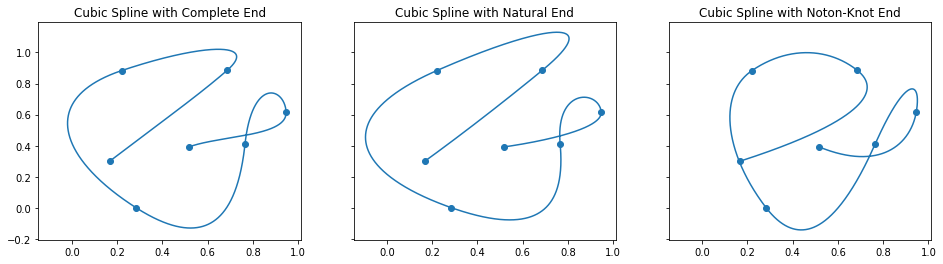

In [77]:
def get_slope(y_values, x_values):
    return (y_values[1]-y_values[0])/(x_values[1]-x_values[0])

def complete_edge_condition(y_values, x_values):
    # Satisfy left edge condition
    row_edge_left = ([0, 0, 1, 0] 
                + [0]*((len(y_values)-2)*4))
    values = np.array([row_edge_left])

    # Satisfy right edge condition
    row_edge_right = ([0]*((len(y_values)-2)*4) 
                + [(x_values[-1]-x_values[-2])**2, 2*(x_values[-1]-x_values[-2]), 1, 0])
    values = np.append(values, [row_edge_right], axis=0)
    
    edge_conditions = [get_slope(y_values[:2], x_values[:2]),
                       get_slope(y_values[-2:], x_values[-2:])] # Complete spline
    
    return edge_conditions, values

def natural_edge_condition(y_values, x_values):
    # Satisfy left edge condition
    row_edge_left = ([0, 0, 1, 0] 
                + [0]*((len(y_values)-2)*4))
    values = np.array([row_edge_left])

    # Satisfy right edge condition
    row_edge_right = ([0]*((len(y_values)-2)*4) 
                + [(x_values[-1]-x_values[-2])**2, 2*(x_values[-1]-x_values[-2]), 1, 0])
    values = np.append(values, [row_edge_right], axis=0)
    
    edge_conditions = [0,0] # Natural spline
    
    return edge_conditions, values

def noton_knot_edge_condition(y_values, x_values):
    # Satisfy left edge condition
    row_edge_left = ([-6, 0, 0, 0, 6, 0, 0, 0] 
                + [0]*((len(y_values)-3)*4))
    values = np.array([row_edge_left])

    # Satisfy right edge condition
    row_edge_right = ([0]*((len(y_values)-3)*4) 
                + [-6, 0, 0, 0, 6, 0, 0, 0])
    values = np.append(values, [row_edge_right], axis=0)
    
    edge_conditions = [0,0] # Noton_knot spline
    
    return edge_conditions, values

def cubic_spline(y_values, x_values, edge):
    if x_values==None:
        x_values = range(len(y_values))
        
    if edge == 'natural':
        edge_conditions, values = natural_edge_condition(y_values, x_values)
    elif edge == 'noton_knot':
        edge_conditions, values = noton_knot_edge_condition(y_values, x_values)
    elif edge == 'complete':
        edge_conditions, values = complete_edge_condition(y_values, x_values)
        
    result_y_values = []
    for i in range(len(y_values)-1):
        result_y_values.append(y_values[i])
        result_y_values.append(y_values[i+1])
    results = np.append(edge_conditions, np.append(np.array(result_y_values), np.zeros(2*(len(y_values)-2))))
    
    for i in range(len(y_values)-1):
        # Satisfy left point of segment
        row_left = ([0]*(i*4) 
                    + [0, 0, 0, 1] # q(x_L)
                    + [0]*((len(y_values)-2-i)*4))
        values = np.append(values, [row_left], axis=0)
        
        # Satisfy right point of segment
        row_right = ([0]*(i*4) 
                    + [0, (x_values[i+1]-x_values[i])**2, x_values[i+1]-x_values[i], 1] # q(x_R)
                    + [0]*((len(y_values)-2-i)*4))
        values = np.append(values, [row_right], axis=0)
        
    for i in range(1, len(y_values)-1):
        # Satisfy the first derivitive at point x_i
        # q_i'(x_i) - q_{i+1}'(x_i) = 0
        row_first_deriv = ([0]*((i-1)*4) 
                    + [(x_values[i]-x_values[i-1])**2, 2*(x_values[i]-x_values[i-1]), 1, 0] # q_i'(x_i)
                    + [0, 0, -1, 0] # -q_{i+1}'(x_i)
                    + [0]*((len(y_values)-2-i)*4))
        values = np.append(values, [row_first_deriv], axis=0)
                    
        # Satisfy the second derivitive at point x_i
        # q_i''(x_i) - q_{i+1}''(x_i) = 0
        row_second_deriv = ([0]*((i-1)*4) 
                    + [4*(x_values[i]-x_values[i-1]), 2, 0, 0] # q_i''(x_i)
                    + [2*(x_values[i]+x_values[i+1]), -2, 0, 0] # -q_{i+1}''(x_i)
                    + [0]*((len(y_values)-2-i)*4))
        values = np.append(values, [row_second_deriv], axis=0)
    
    # values * coefficients = results
    # coefficients = values^(-1) * results
    # print(values)

    coeffs = np.matmul(np.linalg.inv(values), results.transpose()).transpose()
    # print(coeffs)
    return coeffs

def eval_cubic(x_value, x_L, x_R, coefficients):
    # coefficients: [a_3, a_2, a_1, a_0]
    # q(x) = a_0 + a_1(x-x_L) + a_2(x-x_L)^2 + a_3(x-x_L)^2(x-x_R)
    if x_value == x_L:
        return coefficients[3]
    return sum([coefficients[3],
                coefficients[2]*(x_value-x_L),
                coefficients[1]*((x_value-x_L)**2),
                coefficients[0]*((x_value-x_L)**2)*(x_value-x_R)])
    
    
from matplotlib.mlab import frange

def plot_splines(x_values, y_values, edge):
    x_coefficients = cubic_spline(x_values, None, edge)
    y_coefficients = cubic_spline(y_values, None, edge)

    ret_x_values = []
    ret_y_values = []

    for idx in range(len(x_values)-1):
        for i in frange(idx, idx+1,0.001):
            ret_x_values.append(eval_cubic(i, idx, idx+1, x_coefficients[(4*idx):4*(idx+1)]))
            ret_y_values.append(eval_cubic(i, idx, idx+1, y_coefficients[(4*idx):4*(idx+1)]))
            # print(i, ret_x_values[-1], ret_y_values[-1])
    
    return ret_x_values, ret_y_values

fig, ax = plt.subplots(1,3,figsize=(16,4), sharey = True, sharex = True)
# Complete spline using the slopes between the first two and last two points for edge derivitives
plt_x_values, plt_y_values = plot_splines(x_values, y_values, 'complete')
ax[0].plot(plt_x_values, plt_y_values)
ax[0].scatter(x_values, y_values)
ax[0].set_title("Cubic Spline with Complete End")
# Complete spline using zeros for edge derivitives
plt_x_values, plt_y_values = plot_splines(x_values, y_values, 'natural')
ax[1].plot(plt_x_values, plt_y_values)
ax[1].scatter(x_values, y_values)
ax[1].set_title("Cubic Spline with Natural End")
# Noton-Knot spline
plt_x_values, plt_y_values = plot_splines(x_values, y_values, 'noton_knot')
ax[2].plot(plt_x_values, plt_y_values)
ax[2].scatter(x_values, y_values)
ax[2].set_title("Cubic Spline with Noton-Knot End")
plt.show()